In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [151]:
stasiun1 = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Code\\EDA\\stasiun_1_intrp.csv')

In [152]:
stasiun1

,Unnamed: 0,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0
...,...,...,...,...,...,...,...
1822,2020-12-27,29.0,74.0,0.000000,5.7,240.0,2.0
1823,2020-12-28,28.1,77.0,0.050000,6.8,240.0,3.0
1824,2020-12-29,27.1,82.0,0.100000,6.1,240.0,3.0
1825,2020-12-30,27.0,81.0,0.300000,1.4,260.0,2.0


In [153]:
stasiun1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
stasiun1['date'] = pd.to_datetime(stasiun1['date'])

In [154]:
def get_model(data, column):
    df_train = data[['date', column]]
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet()
    my_model.fit(df_train)
    
    return my_model

### Create Rainfall Prediction Model

In [155]:
model_RR = get_model(stasiun1, 'RR')

C:\Users\thebl\AppData\Local\Temp\ipykernel_20488\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
12:00:58 - cmdstanpy - INFO - Chain [1] start processing
12:00:58 - cmdstanpy - INFO - Chain [1] done processing


In [156]:
future_dates = model_RR.make_future_dataframe(periods=365, freq='D')
future_dates.shape[0]

2192

In [157]:
forecast = model_RR.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,14.496083,-4.091956,32.015544
1,2016-01-02,15.144074,-3.803207,32.782797
2,2016-01-03,15.348915,-3.058627,33.398116
3,2016-01-04,14.973873,-2.546371,33.812713
4,2016-01-05,16.086439,-1.415155,34.911636


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


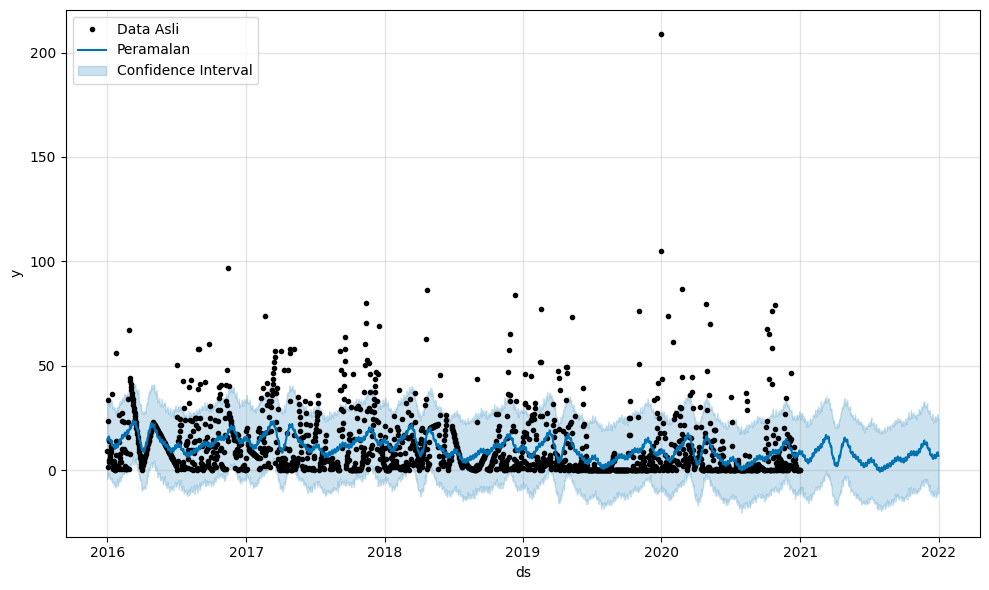

In [158]:
model_RR.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [159]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [160]:
triple_metric(forecast, 'RR')

Mean Absolute Error :  8.65906838818018
Mean Squared Error :  201.70223585170652
Mean Absolute Percentage Error :  1.5936622014210415


In [161]:
predict_res_rr = forecast['yhat'][len(forecast)-720:-355]

### Create Sunshine Duration Prediction Model

In [162]:
model_ss = get_model(stasiun1, 'ss')

C:\Users\thebl\AppData\Local\Temp\ipykernel_20488\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
12:01:00 - cmdstanpy - INFO - Chain [1] start processing
12:01:00 - cmdstanpy - INFO - Chain [1] done processing


In [163]:
future_dates = model_ss.make_future_dataframe(periods=365, freq='D')
forecast = model_ss.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


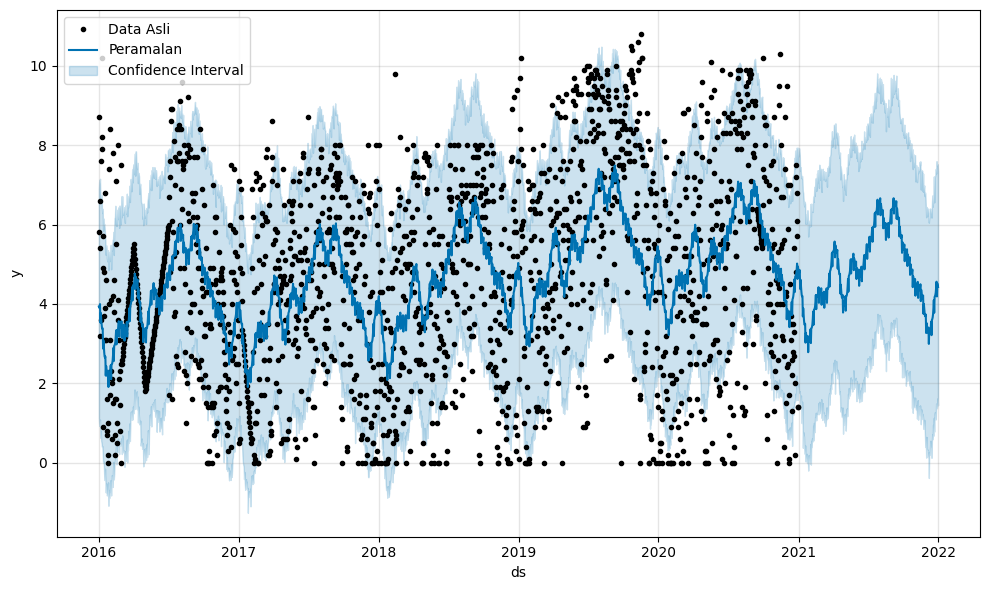

In [164]:
model_ss.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [165]:
triple_metric(forecast, 'ss')

Mean Absolute Error :  2.251154041617564
Mean Squared Error :  7.341145410100989
Mean Absolute Percentage Error :  0.4463960956618233


In [166]:
predict_res_ss = forecast['yhat'][len(forecast)-720:-355]

### Create Average Wind Direction Predict Model

In [167]:
model_ddd = get_model(stasiun1, 'ddd_x')

C:\Users\thebl\AppData\Local\Temp\ipykernel_20488\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
12:01:02 - cmdstanpy - INFO - Chain [1] start processing
12:01:02 - cmdstanpy - INFO - Chain [1] done processing


In [168]:
future_dates = model_ddd.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


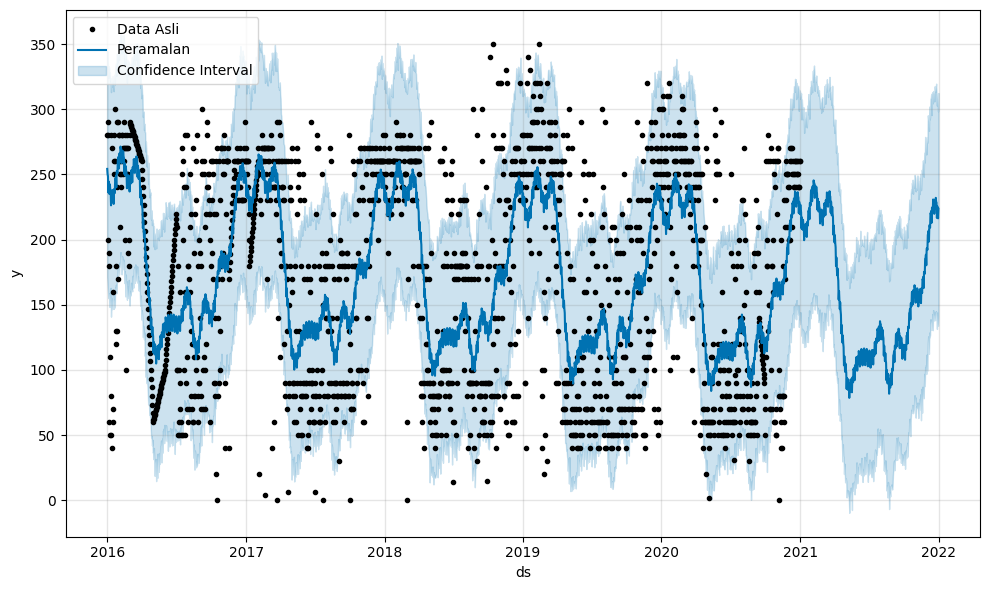

In [169]:
model_ddd.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [170]:
triple_metric(forecast, 'ddd_x')

Mean Absolute Error :  53.08291616163778
Mean Squared Error :  4340.307408843931
Mean Absolute Percentage Error :  0.3707663071180354


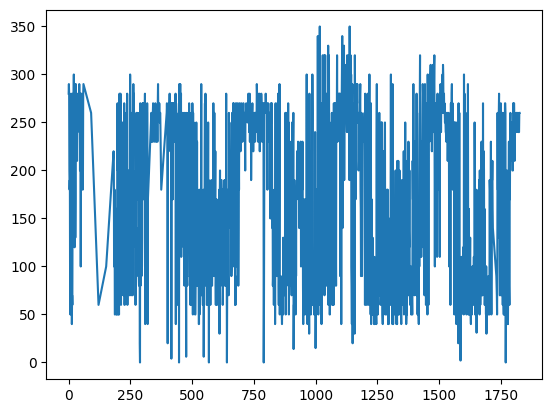

In [171]:
plt.plot(stasiun1['ddd_x'])

In [172]:
df_copy = stasiun1.copy()
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0


In [173]:
# Change the measure into radiant
df_copy['ddd_x'] = df_copy['ddd_x'].apply(lambda x: x * np.pi / 180)
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,4.886922,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,5.061455,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,4.886922,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,3.490659,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,3.141593,1.0


Text(0.5, 1.0, 'ddd_x after convert into radiant')

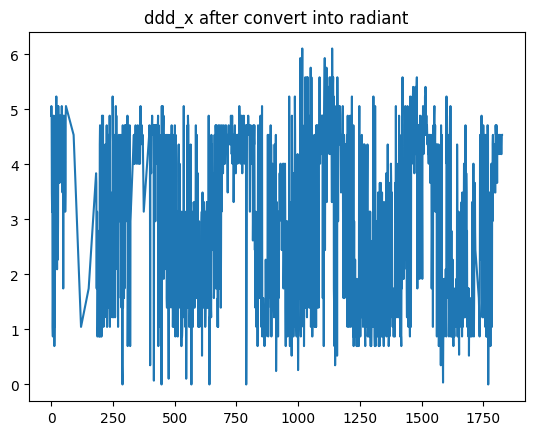

In [174]:
plt.plot(df_copy['ddd_x'])
plt.title('ddd_x after convert into radiant')

In [175]:
model_ddd_2 = get_model(df_copy, 'ddd_x')

C:\Users\thebl\AppData\Local\Temp\ipykernel_20488\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
12:01:04 - cmdstanpy - INFO - Chain [1] start processing
12:01:04 - cmdstanpy - INFO - Chain [1] done processing


In [176]:
future_dates = model_ddd_2.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd_2.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


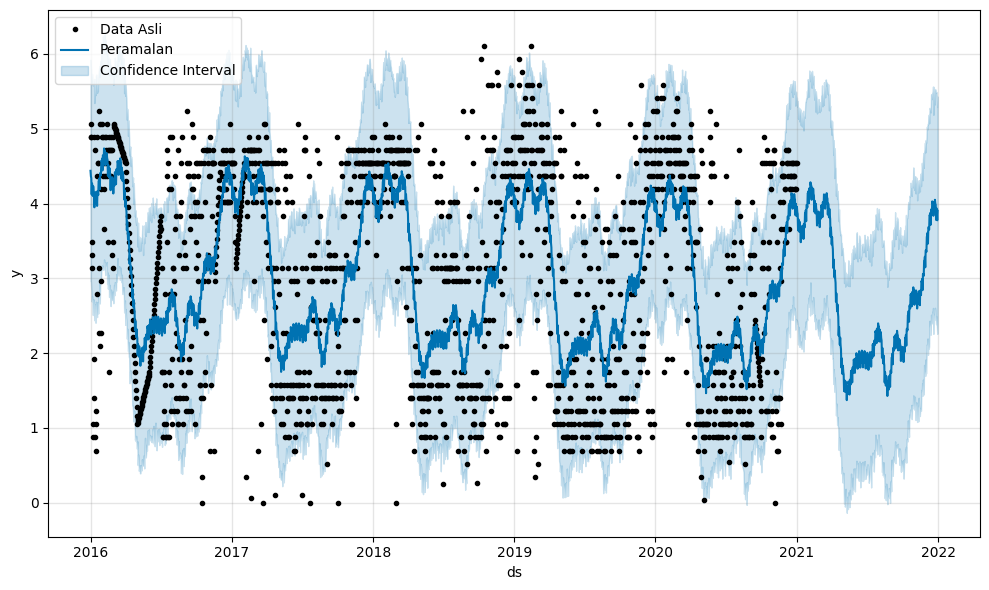

In [177]:
model_ddd_2.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [178]:
mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Squared Error : ',mse)
mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Percentage Error : ',mape)

Mean Absolute Error :  0.9264544083015103
Mean Squared Error :  1.3220923068163482
Mean Absolute Percentage Error :  0.37073456776048813


In [179]:
predict_res_ddd = forecast['yhat'][len(forecast)-720:-355]

### Create Humidity Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_20488\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
12:01:06 - cmdstanpy - INFO - Chain [1] start processing
12:01:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to

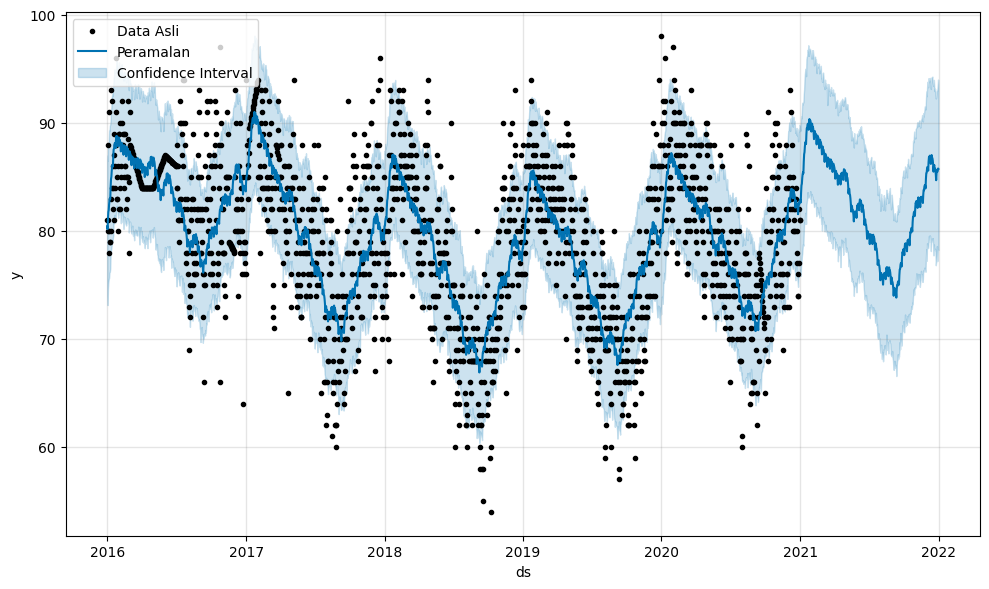

In [180]:
model_RH = get_model(stasiun1, 'RH_avg')
future_dates = model_RH.make_future_dataframe(periods=365, freq='D')
forecast = model_RH.predict(future_dates)

model_RH.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [181]:
triple_metric(forecast, 'RH_avg')

Mean Absolute Error :  4.138728364305093
Mean Squared Error :  26.779884571568633
Mean Absolute Percentage Error :  0.05219402040077517


In [182]:
predict_res_rh = forecast['yhat'][len(forecast)-720:-355]

### Creating Wind Speed Average Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_20488\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
12:01:08 - cmdstanpy - INFO - Chain [1] start processing
12:01:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to

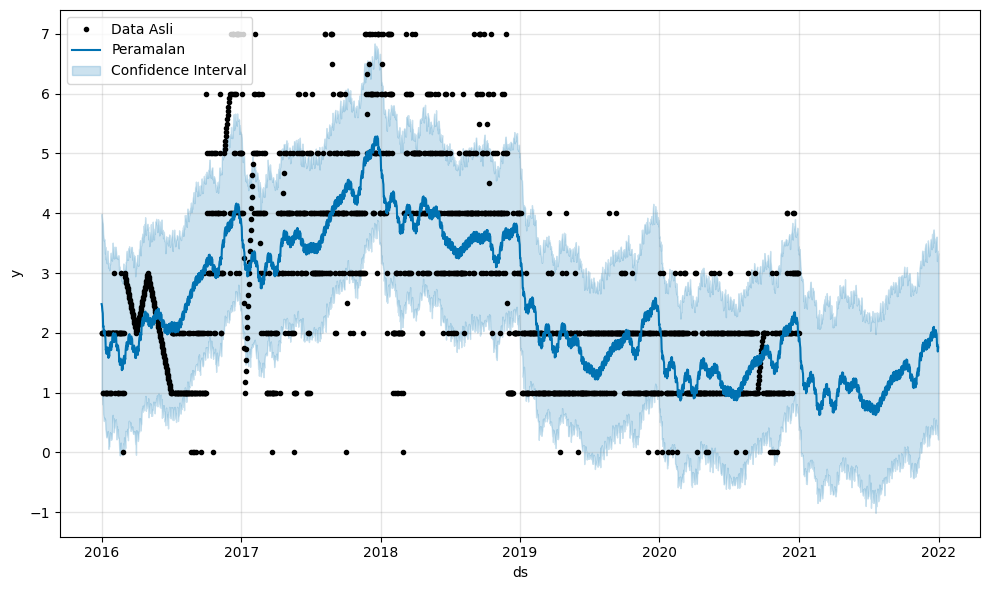

In [183]:
model_ff = get_model(stasiun1, 'ff_avg')
future_dates = model_ff.make_future_dataframe(periods=365, freq='D')
forecast = model_ff.predict(future_dates)

model_ff.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [184]:
triple_metric(forecast, 'ff_avg')

Mean Absolute Error :  0.6127728982599657
Mean Squared Error :  0.5828328319455339
Mean Absolute Percentage Error :  0.44873515368045286


In [185]:
predict_res_ff = forecast['yhat'][len(forecast)-720:-355]

### Create Average Temperature Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_20488\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to

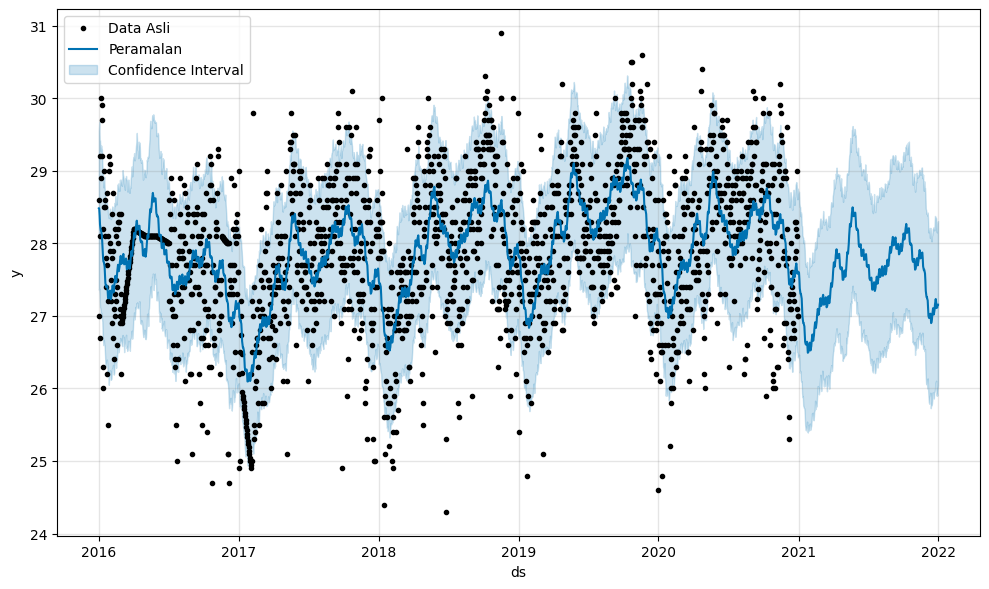

In [186]:
model_T = get_model(stasiun1, 'Tavg')
future_dates = model_T.make_future_dataframe(periods=365, freq='D')
forecast = model_T.predict(future_dates)

model_T.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [187]:
triple_metric(forecast, 'Tavg')

Mean Absolute Error :  0.7665723751731668
Mean Squared Error :  0.908312352587604
Mean Absolute Percentage Error :  0.02737373627157782


In [188]:
predict_res_t = forecast['yhat'][len(forecast)-720:-355]

### Classification Time !!

In [202]:
import pickle

# Buka file pickle
with open('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Code\\models\\Classification Model\\best_classify.pkl', 'rb') as f:
    rf_model = pickle.load(f)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [190]:
predict_res_rr = predict_res_rr.to_frame(name='RR')
predict_res_t = predict_res_t.to_frame(name='Tavg')
predict_res_rh = predict_res_rh.to_frame(name='RH_avg')
predict_res_ss = predict_res_ss.to_frame(name='ss')
predict_res_ff = predict_res_ff.to_frame(name='ff_avg')
predict_res_ddd = predict_res_ddd.to_frame(name='ddd_x')

In [191]:
predict_res_rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1472 to 1836
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RR      365 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [192]:
pred_res_2020 = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr], axis=1)

In [193]:
pred_res_2020['region_name_Jakarta Selatan'] = 1
pred_res_2020['region_name_Jakarta Timur'] = 0
pred_res_2020['region_name_Jakarta Utara'] = 0

In [194]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020['ddd_x'] = pred_res_2020['ddd_x'].apply(convert_radian_to_degree)

In [195]:
pred_res_2020

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,region_name_Jakarta Selatan,region_name_Jakarta Timur,region_name_Jakarta Utara
1472,27.541450,83.789862,4.476094,215.394743,1.534712,7.163284,1,0,0
1473,27.404223,84.481873,4.481403,204.248915,1.506248,6.510112,1,0,0
1474,27.359641,84.656791,3.972455,214.266899,1.310517,7.392941,1,0,0
1475,27.322326,85.171795,4.181301,212.062296,1.354631,7.234228,1,0,0
1476,27.326277,85.436770,4.026902,208.555453,1.265039,5.028084,1,0,0
...,...,...,...,...,...,...,...,...,...
1832,27.304430,84.903598,4.610555,213.060017,1.526397,9.071581,1,0,0
1833,27.303008,85.234364,4.467709,207.617448,1.393903,6.946897,1,0,0
1834,27.268485,85.427483,4.334613,215.206690,1.454732,6.675890,1,0,0
1835,27.238613,85.325428,4.229278,211.615166,1.424339,7.004164,1,0,0


<Axes: >

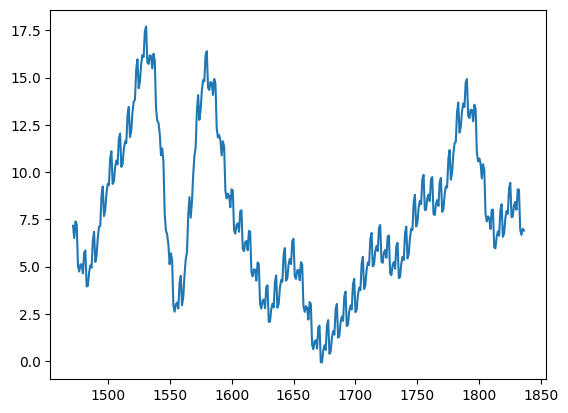

In [196]:
pred_res_2020['RR'].plot()

In [200]:
pred_res_2020

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,region_name_Jakarta Selatan,region_name_Jakarta Timur,region_name_Jakarta Utara
1472,27.541450,83.789862,4.476094,215.394743,1.534712,7.163284,1,0,0
1473,27.404223,84.481873,4.481403,204.248915,1.506248,6.510112,1,0,0
1474,27.359641,84.656791,3.972455,214.266899,1.310517,7.392941,1,0,0
1475,27.322326,85.171795,4.181301,212.062296,1.354631,7.234228,1,0,0
1476,27.326277,85.436770,4.026902,208.555453,1.265039,5.028084,1,0,0
...,...,...,...,...,...,...,...,...,...
1832,27.304430,84.903598,4.610555,213.060017,1.526397,9.071581,1,0,0
1833,27.303008,85.234364,4.467709,207.617448,1.393903,6.946897,1,0,0
1834,27.268485,85.427483,4.334613,215.206690,1.454732,6.675890,1,0,0
1835,27.238613,85.325428,4.229278,211.615166,1.424339,7.004164,1,0,0


In [201]:
flood_predict = rf_model.predict(pred_res_2020)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'monotonic_cst'

In [ ]:
flood_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
sum = np.sum(flood_predict == 1)

In [ ]:
sum

8